<a href="https://colab.research.google.com/github/cmooncs/ESF_COCO_2025/blob/main/WordRepresentation_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec model
<b>Model training a on large dataset</b><br>
<i> Note: To make and save the changes to the colab notebook go to 'File -> Save a copy in Drive' </i>


#0. Install (if needed) and import libraries ‧₊˚🖇️✩ ₊˚📖

In [59]:
import os
import sys
import subprocess, warnings
# Suppress output
with open(os.devnull, 'w') as devnull:
  subprocess.check_call([sys.executable, "-m", "pip", "install", "package-name"], stdout=devnull, stderr=devnull)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")



In [61]:
import os
import sys
import subprocess
# Suppress output
with open(os.devnull, 'w') as devnull:
  subprocess.check_call([sys.executable, "-m", "pip", "install", "package-name"], stdout=devnull, stderr=devnull)
!pip install spacy --quiet
!python -m spacy download en_core_web_sm
!pip install bs4 --quiet
#!pip install lxml
!pip install nltk --quiet
!pip install gensim --quiet
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Import all nesessary libraries 🚚

In [62]:
import re, string
import pandas as pd
from time import time
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
from bs4 import BeautifulSoup
import re, string
%matplotlib inline

# 2. Load and look at the data from a file containing raw text of BBC news (news category: business, entertainment, politics, sport, and tech.) 🗞🗞
This is BBC news (text data)  <br><a href = "https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv"> Data</a> ⛁ from an online <a href ="https://github.com/suraj-deshmukh/BBC-Dataset-News-Classificationc"> source</a>.

In [63]:
import pandas as pd
url = 'https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv'
df1 = pd.read_csv(url,encoding = "ISO-8859-1")
#df1 =df1['news']
df1

,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business
...,...,...
2220,Microsoft launches its own search\n \n Microso...,tech
2221,Warnings about junk mail deluge\n \n The amoun...,tech
2222,Microsoft gets the blogging bug\n \n Software ...,tech
2223,Gamers snap up new Sony PSP\n \n Gamers have b...,tech


# 3. Preparing the data (cleaning text) 🧼🫧🧺🧽🧹

In [64]:
clean = []
for doc in df1['news']:
    t = doc.lower() # lower case
    t = BeautifulSoup(t,'html.parser').text #remove tags
    t = re.sub('[^A-Za-z0-9]+',' ',t)# remove special characters/symbols
    clean.append(t)
df1['clean']= clean


<b>--> Look at the text after cleaning(preprocessing)

In [65]:
df1.head()

,news,type,clean
0,China had role in Yukos split-up\n \n China le...,business,china had role in yukos split up china lent ru...
1,Oil rebounds from weather effect\n \n Oil pric...,business,oil rebounds from weather effect oil prices re...
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business,indonesia declines debt freeze indonesia no lo...
3,$1m payoff for former Shell boss\n \n Shell is...,business,1m payoff for former shell boss shell is to p...
4,US bank in $515m SEC settlement\n \n Five Bank...,business,us bank in 515m sec settlement five bank of am...


<b>--> The training sample size (how many words present in the vocabulary?)

In [66]:
sentences = [row.split() for row in df1['clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1

print('Documents:',len(sentences))
print('Words:',len(word_freq))

Documents: 2225
Words: 29454


<b>--> What are the highly frequent words?

In [67]:
sorted(word_freq, key=word_freq.get, reverse= True)[:10]


['the', 'to', 'of', 'and', 'a', 'in', 's', 'for', 'is', 'that']

# 4. Define Word2Vec model 💡

In [68]:
w2v_model = Word2Vec(min_count=1,
                     window=5,
                     #size=100,
                     workers=1, seed = 1)

#5. Build a vocabulary 🔠

---



In [69]:
w2v_model.build_vocab(sentences)

<b>-->Check vocabulary

In [70]:
wordlist = list(w2v_model.wv.index_to_key)
print(wordlist[5:20])# 15 words from the vocabulary
#print(wordlist)# The whole list of vocabulary

['in', 's', 'for', 'is', 'that', 'it', 'on', 'said', 'was', 'he', 'be', 'with', 'as', 'has', 'have']


# 6. Train the model 🛠️ ⚙️🤖🦾

In [71]:
# Train the Word2Vec model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)


(3463919, 4381550)

# 7. Explore the model ⋆⭒˚.⋆🪐 ⋆⭒˚.⋆

<b>--> Most similar words for a given word

In [72]:
# Explore the model
w = 'internet' # example word = 'internet'
w2v_model.wv.most_similar(positive=[w])

[('networks', 0.9541459679603577),
 ('net', 0.9524144530296326),
 ('products', 0.9457414150238037),
 ('pcs', 0.9435450434684753),
 ('computers', 0.93808913230896),
 ('spread', 0.9324747920036316),
 ('tools', 0.9310160875320435),
 ('businesses', 0.9299315810203552),
 ('infected', 0.9285639524459839),
 ('files', 0.9263722896575928)]

<b>--> Top 5 similar words

In [73]:
w = 'china' # example word 'russia'
w2v_model.wv.most_similar(positive=[w],topn =5)

[('india', 0.9685223698616028),
 ('nintendo', 0.9519595503807068),
 ('japan', 0.9514790177345276),
 ('psp', 0.9428341388702393),
 ('america', 0.9354479908943176)]

<b>--> Similarity between two words

In [74]:
u = 'man'; v = 'woman' #other example words 'sea' and 'water'
similarity_score = w2v_model.wv.similarity(u, v)
print(similarity_score)

0.90640634


In [75]:
u = 'water'; v = 'sea'
similarity_score = w2v_model.wv.similarity(u,v)
print(similarity_score)

0.9267219


Not so close words

In [27]:
u = 'highly'; v = 'sunday' #other not so close meaning words
similarity_score = w2v_model.wv.similarity(u,v)
print(similarity_score)

-0.22497152


<b>--> Analogy (from the triplet),<br> E.g., go: went :: come: ? ;  Answer: came

---



In [76]:
def analogy(a,b,c):
  ans = w2v_model.wv.most_similar(negative=[a],positive=[b,c],topn =1) # E.g., rain+fly-raining =flying
  print ('Answer: ', ans[0][0])



In [77]:
analogy('he','she','his')

Answer:  her


In [78]:
analogy('go','went','come')

Answer:  came


In [79]:
analogy('days','month','months')

Answer:  year


In [80]:
analogy('man','woman', 'king')

Answer:  regulator


<b>--> Plot embeddings</b><br>
  Consider some common terms in the vocabulary as given in the following example

In [81]:
# We create 65 informative terms that compose our model vocabulary (to see how they are embedded in the vector space)
informative_terms = ("bad", "great", "best", "worst", "fun", "beautiful",
                     "excellent", "poor", "boring", "awful", "terrible",
                     "definitely", "perfect", "liked", "worse", "waste",
                      "loved", "unfortunately", "amazing",
                     "enjoyed", "favourite", "horrible", "brilliant", "highly",
                     "sunday","monday","friday","computer", "software","network",
                     "business", "bank", "money",
                     "simple", "annoying", "today", "hilarious", "enjoyable",
                     "dull", "fantastic", "poorly", "fails", "disappointing",
                     "disappointment", "not", "him", "her", "good", "time",
                       "action","china", "moscow","usa","brazil",
                     "drama", "family", "dialogue","plot","acting",
                     '1','2','3','100','1bn','3bn')
len(informative_terms)

65

<b>--> Define and call a function to plot (using TSNE tool)

In [82]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def tsne_plot(model, words_labels):
    """Create TSNE model and plot it"""
    labels = []
    tokens = []

    # Collect vectors for words in vocabulary
    for word in words_labels:
        if word in model.wv.key_to_index:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Word '{word}' not in vocabulary")

    # Convert list of vectors to NumPy array
    tokens_np = np.array(tokens)

    # Ensure perplexity is less than number of samples
    perplexity = min(5, len(tokens_np) - 1)

    # Create TSNE model
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', max_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens_np)

    # Separate x and y coordinates
    x = [value[0] for value in new_values]
    y = [value[1] for value in new_values]

    # Plot
    plt.figure(figsize=(10, 10))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

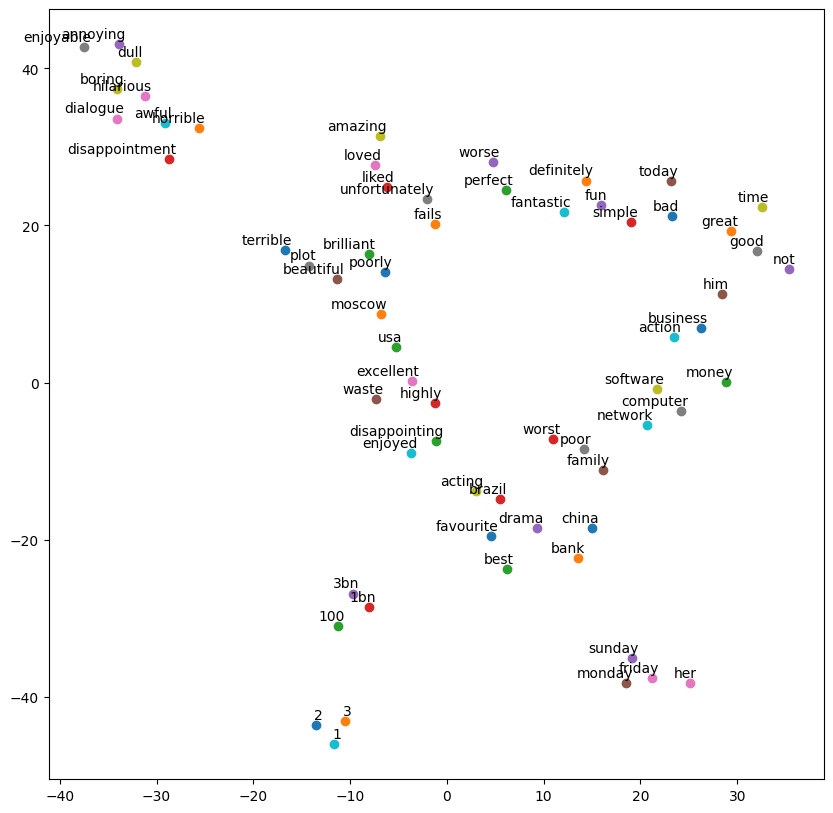

In [83]:
 ## call this function
tsne_plot(w2v_model,informative_terms)